<h2> Importing Libraries </h2>

In [2]:
import pandas as pd
import re 
import os
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import nltk
import text2emotion as te
from nltk.stem.wordnet import WordNetLemmatizer
words = set(nltk.corpus.words.words())

In [3]:
from transformers import *
sentiment = pipeline('sentiment-analysis')

All model checkpoint weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


<h2> Uploading Files</h2>

In [4]:
data1=pd.read_csv("../Data/farmbill2.csv")
data1.drop(["Unnamed: 0"],axis=1,inplace=True)
data1.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,2021-01-01 23:48:40,1345155008967241729,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN
1,2021-01-01 21:16:19,1345116670075883521,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India
2,2021-01-01 20:10:18,1345100056416800768,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India"
3,2021-01-01 19:49:52,1345094912627200003,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN
4,2021-01-01 19:27:42,1345089335935295490,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN


In [5]:
data=pd.read_csv("/home/tarushi/Desktop/data_anecdotes/Projects/Farmbill/Data/farmbill.csv")
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,2020-12-24 23:34:48,1342252416159285249,Check it out :) Albert #Modi #FarmersBill #far...,Twitter for iPhone,1,3,NaN
1,2020-12-24 23:32:04,1342251729472122881,#farmersprotests #farmers #FarmersBill \nFarme...,Twitter Web App,1,4,"43°52'15.0""N 79°31'54.8""W"
2,2020-12-24 23:25:34,1342250092531630081,Farmers are lifeline Thanks for feedin...,Twitter for iPhone,8,18,NaN
3,2020-12-24 23:04:20,1342244749919436801,India's reputation by Wikipedia\nModi needs to...,Twitter for Android,2,3,NaN
4,2020-12-24 22:52:17,1342241716552650752,@JKAURZZ Jdo journalism rishwat de ke keeti h...,Twitter for Android,0,1,NaN


In [6]:
data=data1.append(data)

In [7]:
data.reset_index(inplace=True)
data.head()

,index,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,0,2021-01-01 23:48:40,1345155008967241729,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN
1,1,2021-01-01 21:16:19,1345116670075883521,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India
2,2,2021-01-01 20:10:18,1345100056416800768,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India"
3,3,2021-01-01 19:49:52,1345094912627200003,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN
4,4,2021-01-01 19:27:42,1345089335935295490,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN


In [8]:
data.drop(['index'],axis=1,inplace=True)

In [9]:
data['Date']=pd.to_datetime(data['Date'])
data['Date'].dtypes

dtype('<M8[ns]')

In [10]:
data.drop(['User Id'],axis=1,inplace=True)
data.to_csv("./tweetsfarmbills.csv")

<h2> Data Cleaning </h2>

In [11]:
data['Tweet'][0]


'#respecteachother #kissanAndolan #KisanVirodhiNarendraModi #FarmersProtest #FarmersBill #FarmersBill #Farmers #FarmersBill2020\n\nWhen you stop listening and just want to proof that only you are right... U r behaving like a communist. \nLET BEHAVE LIKE a democratic nation.\n🙏🙏'

In [43]:
import contractions
def clean_txt(input_txt, pattern):
    #removing hashtags,emojis,stopwords
    input_txt=re.sub(r'#[\w]*','',input_txt)
    input_txt=input_txt.encode("ascii","ignore")
    input_txt=input_txt.decode()
    
    ##removing @user
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
   
    #removing stopwords    
    input_txt = ' '.join([i for i in input_txt.split() if not i in words])

    #removing punctuation,numbers and whitespace   
    res=re.sub(r'[^\w\s]', '', input_txt.lower())
    res=re.sub('\s+',' ',res)
    ##removing links
    res=re.sub(r'https[\w]*', '', res, flags=re.MULTILINE)
    #removing acronyms
    res=''.join(i for i in res if not i.isdigit())
    res=' '.join([i for i in res.split() if len(i)>2])
    lem = WordNetLemmatizer()
    res = lem.lemmatize(res)
    
    return res
clean_txt(data['Tweet'][0],"@[\w]*")

'when right behaving communist let behave like nation'

In [51]:
data['Clean Tweet']=np.vectorize(clean_txt)(data['Tweet'], "@[\w]*")
data.head()

,Date,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet,SS
0,2021-01-01 23:48:40,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN,when right behaving communist let behave like ...,NEGATIVE
1,2021-01-01 21:16:19,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India,farmers protest must,NEGATIVE
2,2021-01-01 20:10:18,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India",half remaining yogendra yadav amp,NEGATIVE
3,2021-01-01 19:49:52,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN,could drafted bettercoming academicians focuse...,NEGATIVE
4,2021-01-01 19:27:42,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN,revolution turningpoint france europe wider world,POSITIVE


<h2> Data Analysis </h2>

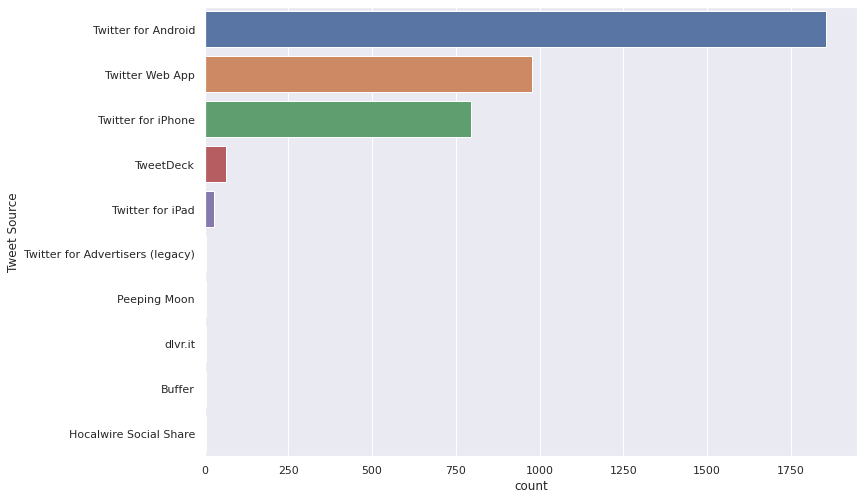

In [77]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(y="Tweet Source",  data=data,order=data['Tweet Source'].value_counts().iloc[:10].index)
plt.savefig("./sources")
plt.show()

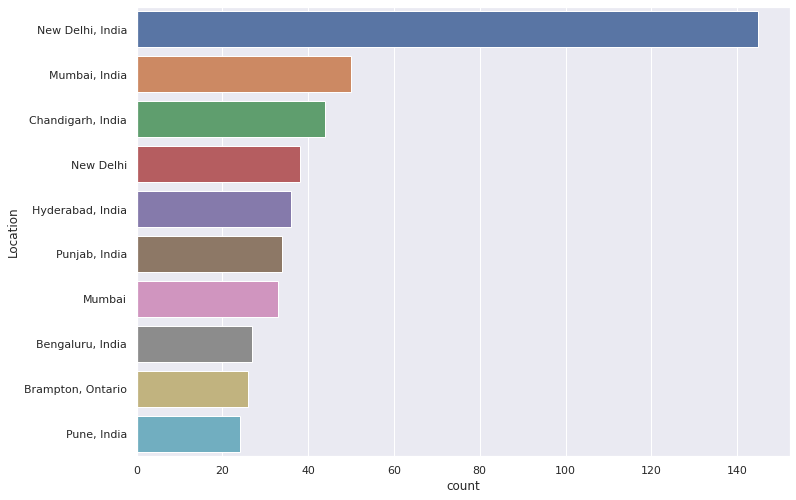

In [76]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(y="Location",  data=data,order=data['Location'].value_counts().iloc[1:11].index)
plt.savefig("./locations")
plt.show()

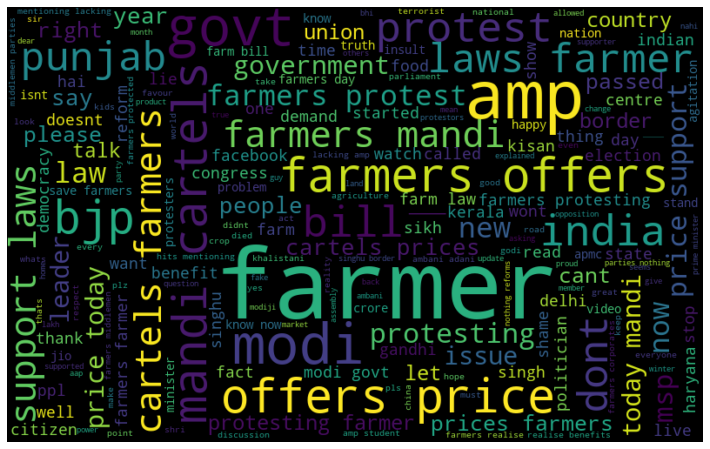

In [50]:
wcloud=' '.join([i for i in data['Clean Tweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(wcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("./wcloud.png")
plt.show()

<h2> Getting Sentiment Scores </h2>

In [17]:
def get_scores(text):
    txt=sentiment(text)
    return txt[0]['label']

In [18]:
data['Clean Tweet'][0]

'when right behaving communist let behave like nation'

In [52]:
ss=[get_scores(row['Clean Tweet']) for _,row in data.iterrows()]
data['SS']=ss
data.head()

,Date,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet,SS
0,2021-01-01 23:48:40,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN,when right behaving communist let behave like ...,NEGATIVE
1,2021-01-01 21:16:19,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India,farmers protest must,NEGATIVE
2,2021-01-01 20:10:18,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India",half remaining yogendra yadav amp,NEGATIVE
3,2021-01-01 19:49:52,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN,could drafted bettercoming academicians focuse...,NEGATIVE
4,2021-01-01 19:27:42,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN,revolution turningpoint france europe wider world,POSITIVE


<h2> Analysis on Basis of the Score</h2>

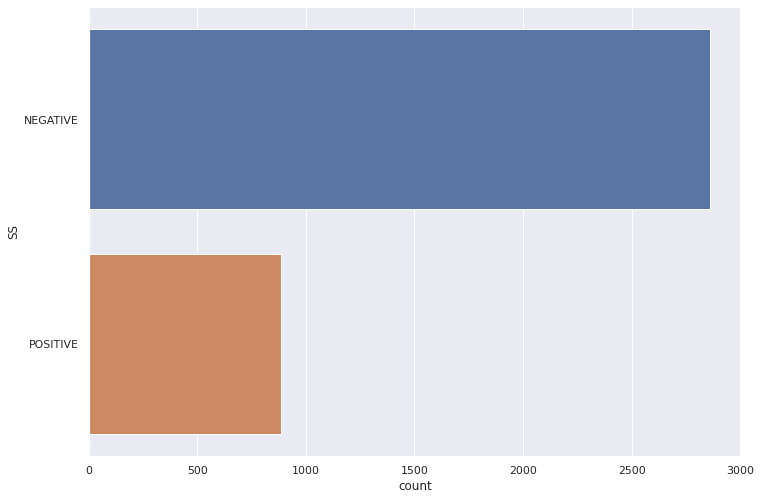

In [20]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(y=data['SS'])
plt.show()

In [53]:
pos=[]
neg=[]
for _,row in data.iterrows():
    if(row['SS']=="POSITIVE"):
        pos.append(row['Clean Tweet'])
    elif(row['SS']=="NEGATIVE"):
        neg.append(row['Clean Tweet'])

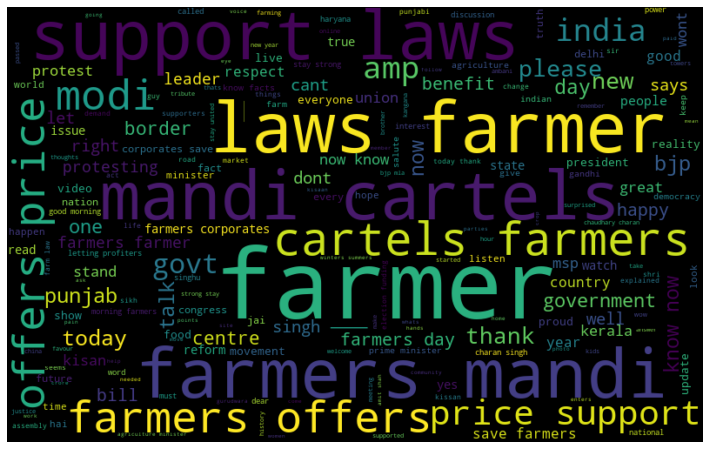

In [54]:
poscloud=' '.join([i for i in pos])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(poscloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
#plt.savefig("./decpcloud.png")
plt.show()

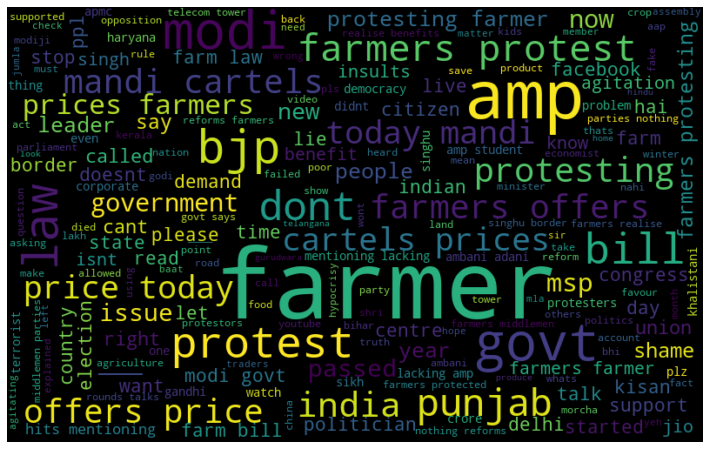

In [56]:
negcloud=' '.join([i for i in neg])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
#plt.savefig("./decncloud.png")
plt.show()

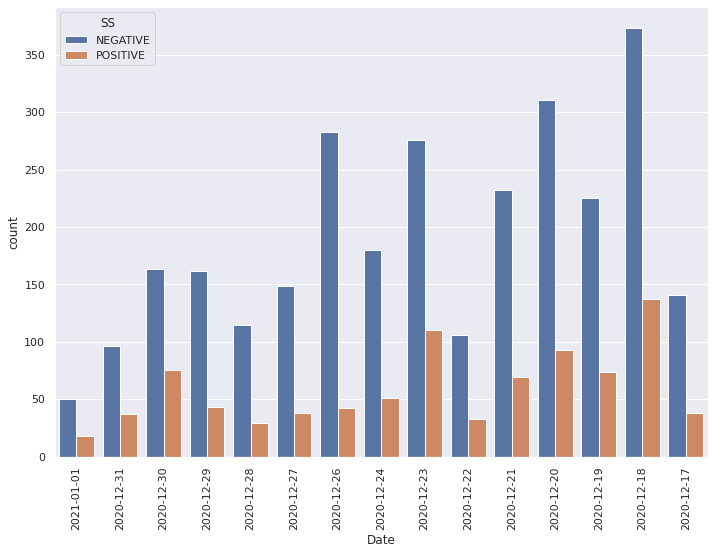

In [26]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(data['Date'].dt.date,hue=data['SS'])

plt.xticks(rotation=90)
#plt.savefig("./SAdec.png")
plt.show()

In [27]:
def hashtag_extract(x):
    hashtags = []
    not_consider=['farmbills','farmersbill','farmersbill2020','farmers','farmerprotest','farmerprotestd','farmersprotests','farmersprotest','indianfarmersrevolution2020']
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        ht=[j for j in ht if j.lower() not in not_consider]
        ht=[j for j in ht if j]
        hashtags.append(ht)

    return hashtags


In [28]:
HT_regular = hashtag_extract(data['Tweet'][data['SS'] == "POSITIVE"])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['Tweet'][data['SS'] == "NEGATIVE"])
pos_h=[]
            # unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

/home/tarushi/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tarushi/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0, flags=flags)


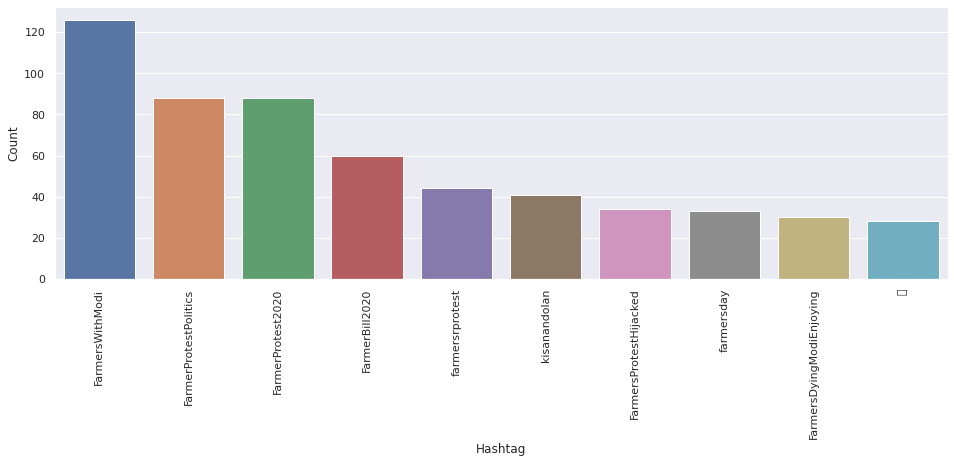

In [29]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.savefig("./phashtags.png")
plt.show()

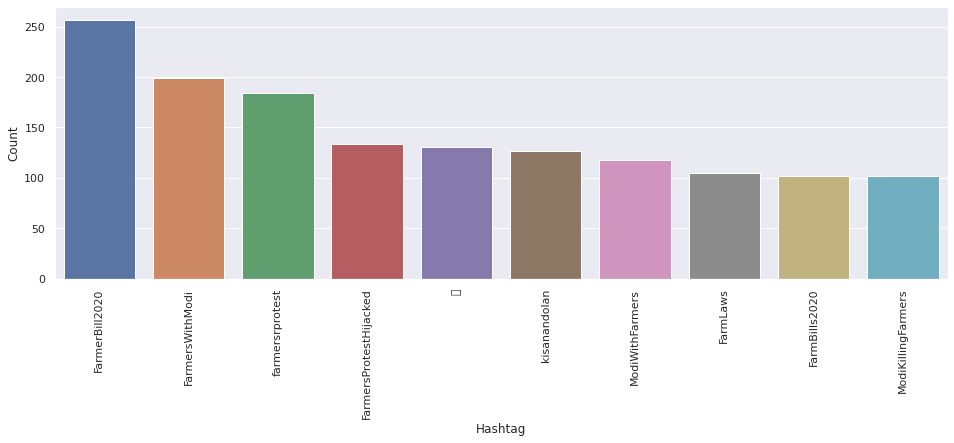

In [33]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.savefig("./nhashtags.png")
plt.show()